In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


# Telco Customer Churn Prediction model here uses LogisticRegressionCV, AdaBoostClassifier, RandomForestClassifier and SupportVectorMachines(SVC). LogisiticRegressionCV has an accuracy of 82% which indicated this model is best suitable for predicting the customer churn rates.

In [2]:
df=pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# df.head() gives the top 5 values of the dataset

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# df.info() is used to give a brief description of the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# df.describe() gives the statistical information of the dataset

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Importing necessary libraries

In [6]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score 
from sklearn.pipeline import Pipeline

# Feature selection

In [7]:
X=df.drop(['customerID','Churn'],axis=1)
y=df['Churn']

# Splitting the dataset

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# EDA (Exploratory Data Analysis)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


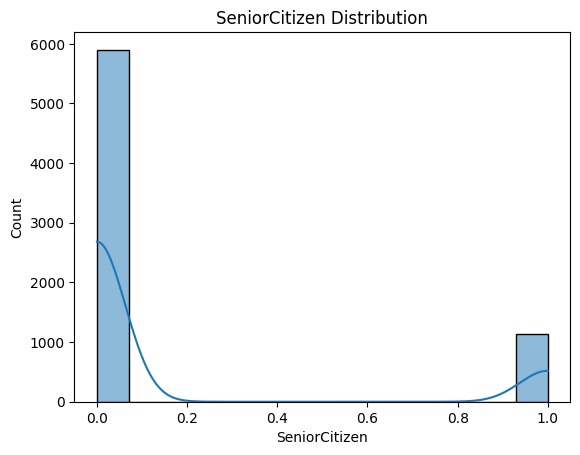

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


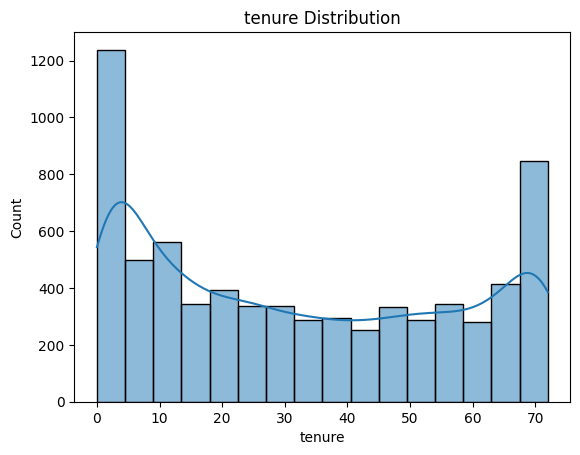

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


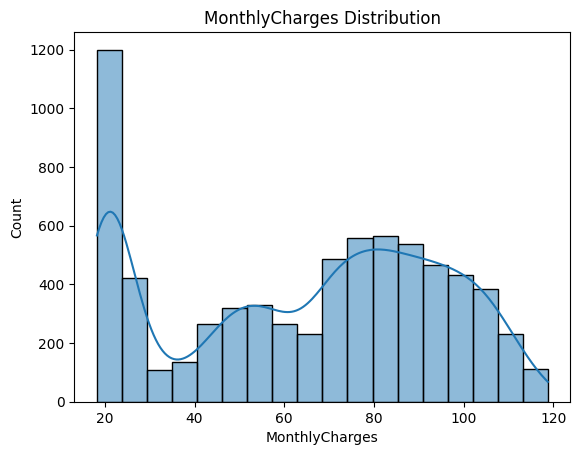

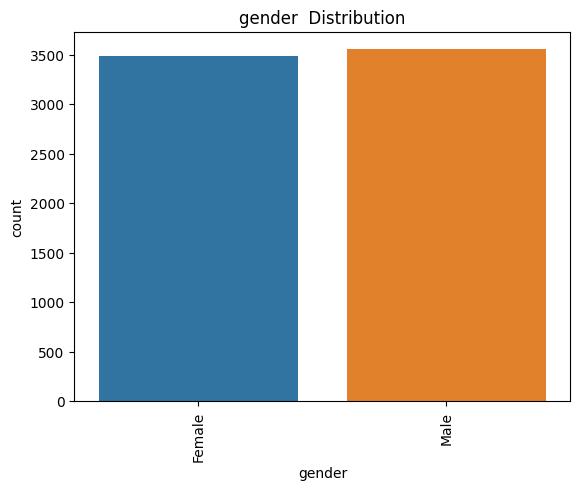

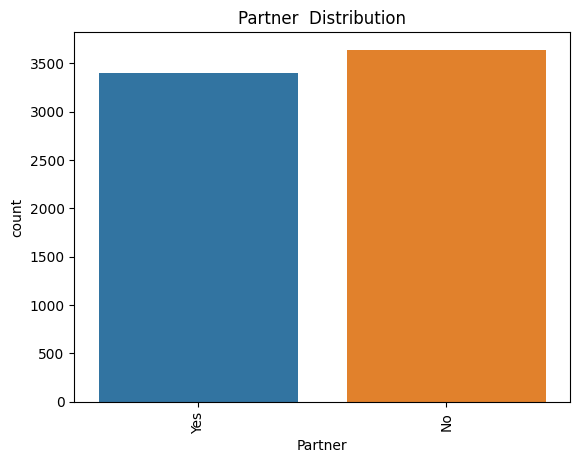

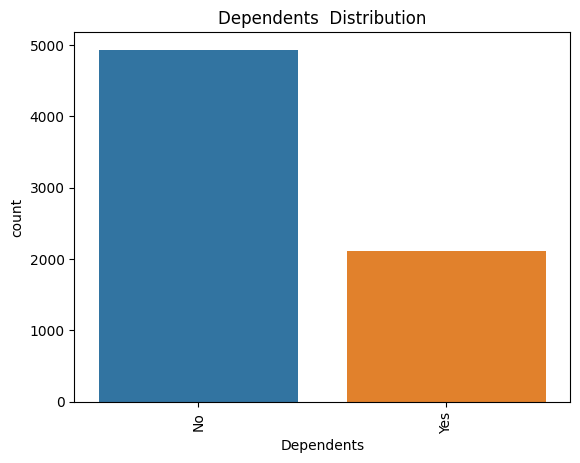

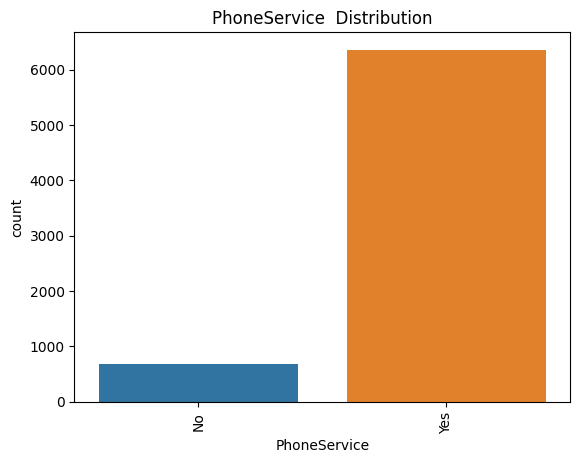

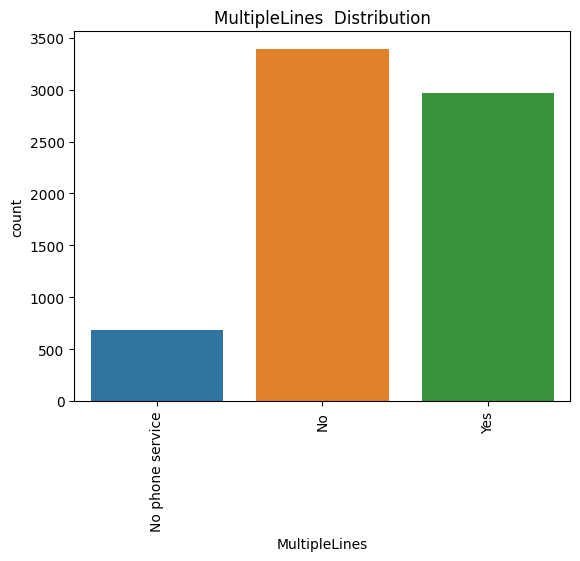

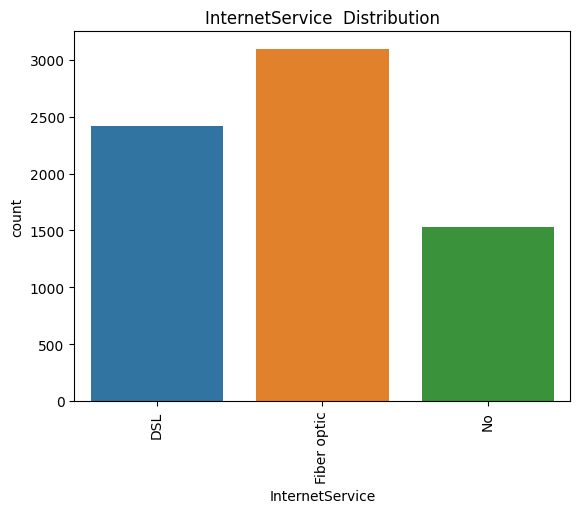

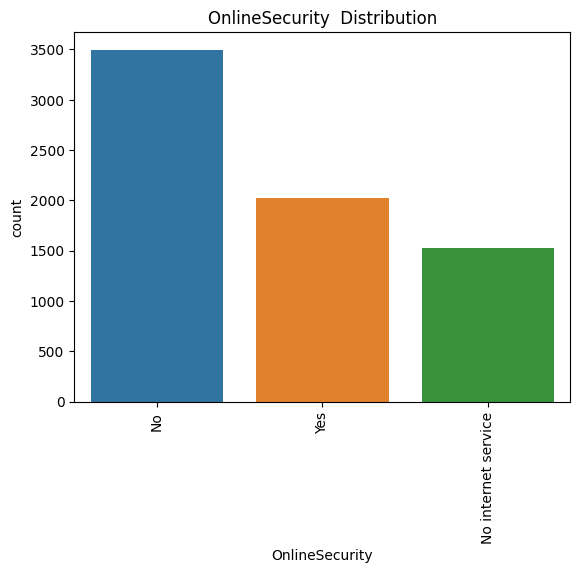

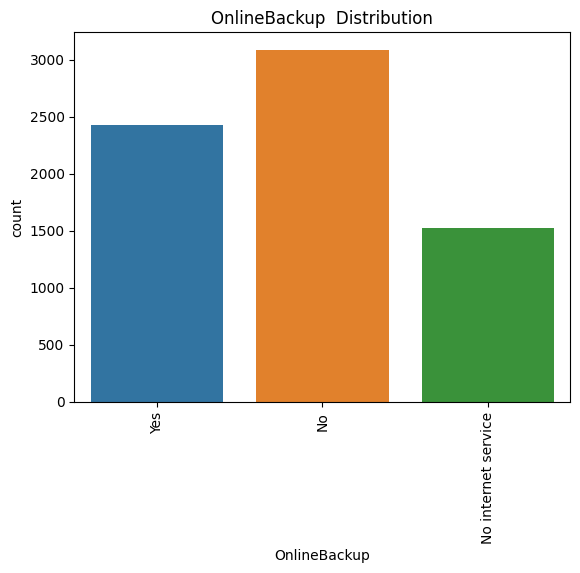

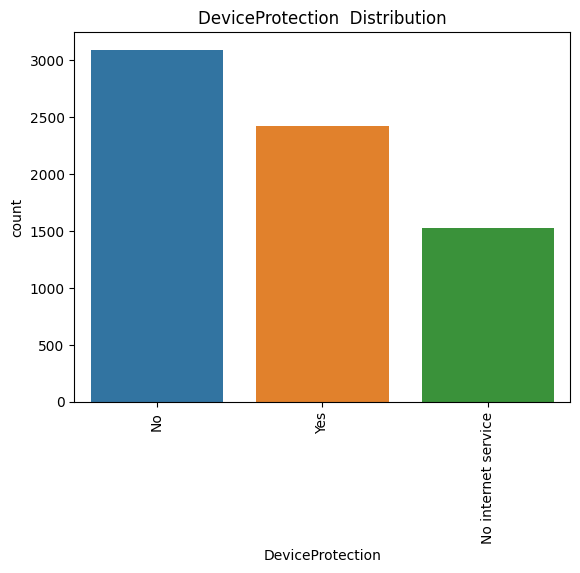

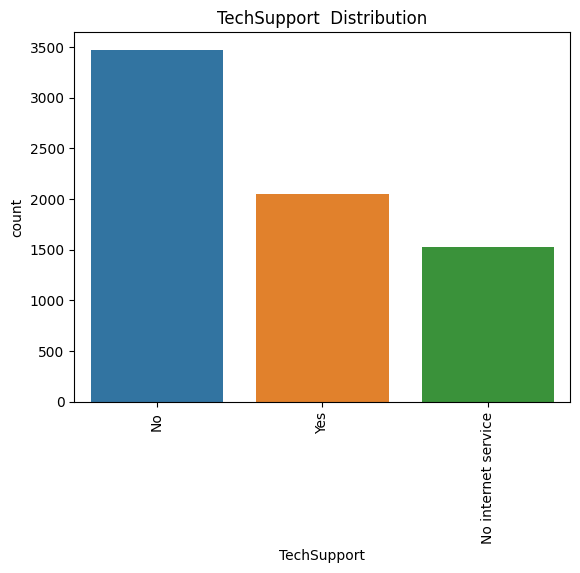

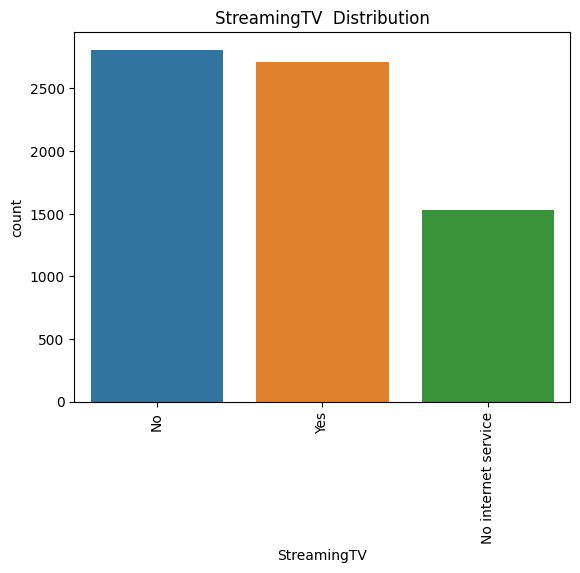

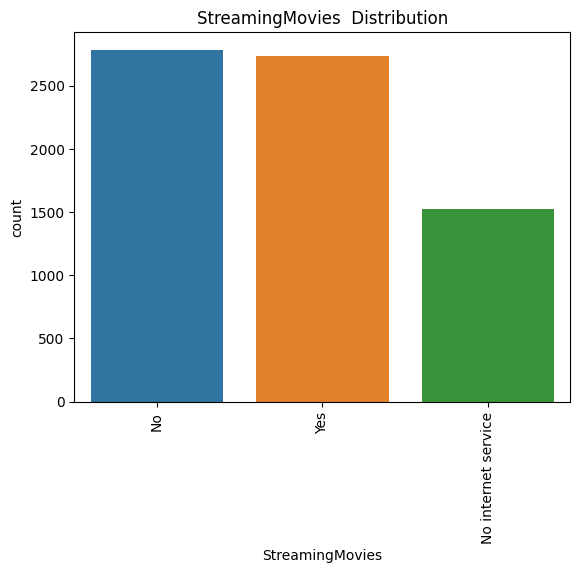

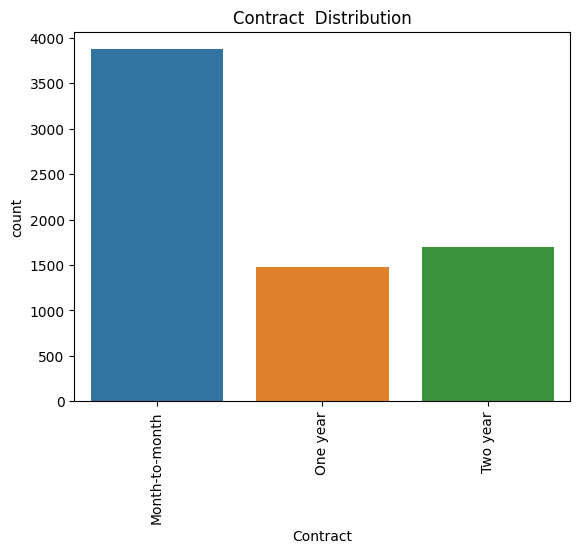

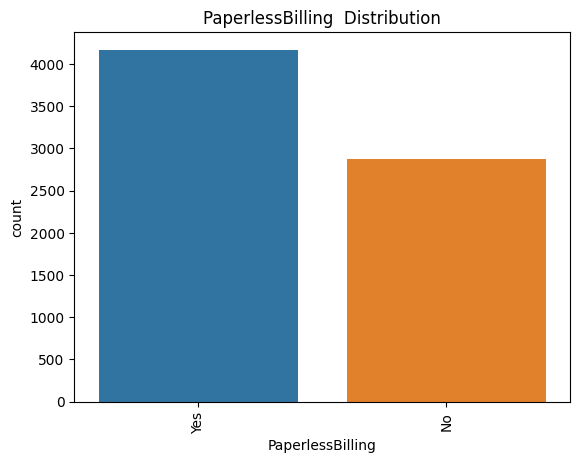

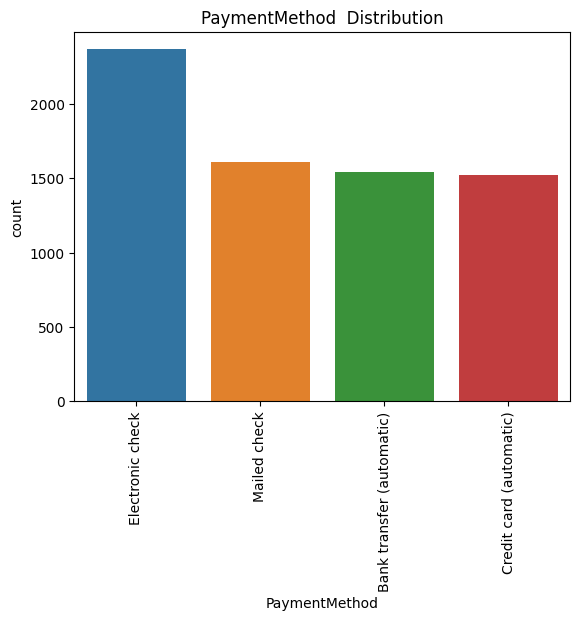

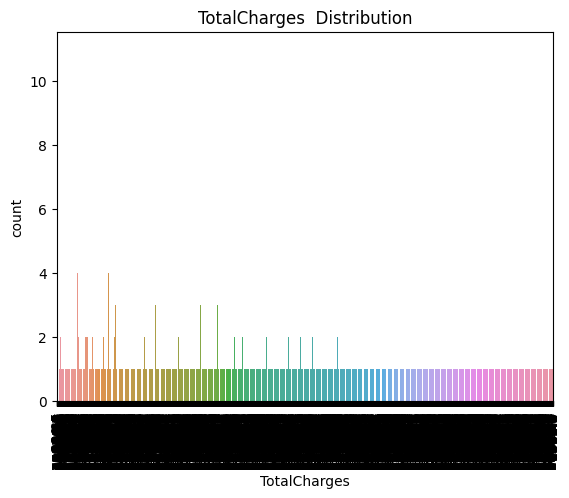

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
numeric_features=X.select_dtypes(include=['int64','float64']).columns
categoric_features=X.select_dtypes(include=['object']).columns
for feature in numeric_features:
    sns.histplot(df[feature],kde=True)
    plt.title(f'{feature} Distribution')
    plt.show()
for feature in categoric_features:
    sns.countplot(x=feature,data=df)
    plt.title(f'{feature}  Distribution')
    plt.xticks(rotation=90)
    plt.show()

In [10]:
numeric_col=Pipeline(steps=[
    ('impute',SimpleImputer(strategy='mean')),
    ('scaler',StandardScaler())
])
categoric_col=Pipeline(steps=[
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('onehot',OneHotEncoder(handle_unknown='ignore'))
])
preprocessor=ColumnTransformer(
transformers=[
    ('num',numeric_col,numeric_features),
    ('cat',categoric_col,categoric_features)
])

In [11]:
import warnings
warnings.filterwarnings('ignore')
model=Pipeline(steps=[
    ('preprocesor',preprocessor),
    ('classifier',LogisticRegressionCV(max_iter=1000))
])
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('Accuracy Score:', accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

Accuracy Score: 0.8204400283889283
[[940 157]
 [ 96 216]]
              precision    recall  f1-score   support

          No       0.91      0.86      0.88      1097
         Yes       0.58      0.69      0.63       312

    accuracy                           0.82      1409
   macro avg       0.74      0.77      0.76      1409
weighted avg       0.83      0.82      0.83      1409



In [12]:
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from xgboost import XGBClassifier
model2=Pipeline(steps=[
    ('preprocesor',preprocessor),
    ('classifier',AdaBoostClassifier())
])
model2.fit(X_train,y_train)
y_pred2=model2.predict(X_test)
print('Accuracy Score:', accuracy_score(y_pred2,y_test))
print(confusion_matrix(y_pred2,y_test))
print(classification_report(y_pred2,y_test))

Accuracy Score: 0.8133427963094393
[[925 152]
 [111 221]]
              precision    recall  f1-score   support

          No       0.89      0.86      0.88      1077
         Yes       0.59      0.67      0.63       332

    accuracy                           0.81      1409
   macro avg       0.74      0.76      0.75      1409
weighted avg       0.82      0.81      0.82      1409



In [13]:
model3=Pipeline(steps=[
    ('preprocesor',preprocessor),
    ('classifier',RandomForestClassifier())
])
model3.fit(X_train,y_train)
y_pred3=model3.predict(X_test)
print('Accuracy Score:', accuracy_score(y_pred3,y_test))
print(confusion_matrix(y_pred3,y_test))
print(classification_report(y_pred3,y_test))

Accuracy Score: 0.7913413768630234
[[947 205]
 [ 89 168]]
              precision    recall  f1-score   support

          No       0.91      0.82      0.87      1152
         Yes       0.45      0.65      0.53       257

    accuracy                           0.79      1409
   macro avg       0.68      0.74      0.70      1409
weighted avg       0.83      0.79      0.81      1409



In [14]:
from sklearn.svm import SVC
model4=Pipeline(steps=[
    ('preprocesor',preprocessor),
    ('classifier',SVC(kernel='linear', random_state=42))
])
model4.fit(X_train,y_train)
y_pred4=model4.predict(X_test)
print('Accuracy Score:', accuracy_score(y_pred4,y_test))
print(confusion_matrix(y_pred4,y_test))
print(classification_report(y_pred4,y_test))

Accuracy Score: 0.8090844570617459
[[922 155]
 [114 218]]
              precision    recall  f1-score   support

          No       0.89      0.86      0.87      1077
         Yes       0.58      0.66      0.62       332

    accuracy                           0.81      1409
   macro avg       0.74      0.76      0.75      1409
weighted avg       0.82      0.81      0.81      1409

